In [1]:
%pylab inline 
import pandas as pd
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = Series([10, 20, 30, 50, 55, 70, 75, 90])
s

0    10
1    20
2    30
3    50
4    55
5    70
6    75
7    90
dtype: int64

In [3]:
s = Series([10, 20, 30, 50, 55, 70, 75, 90],
          index=list('abcdefgh'))
s

a    10
b    20
c    30
d    50
e    55
f    70
g    75
h    90
dtype: int64

In [4]:
# retrieve via our index with .loc
s.loc['c']

30

In [5]:
# retrieve via position (original/default index) with .iloc
s.iloc[6]

75

In [7]:
s = Series('wow i love to use pandas to work with strings'.split())
s

0        wow
1          i
2       love
3         to
4        use
5     pandas
6         to
7       work
8       with
9    strings
dtype: object

In [8]:
s.str.len()  # ask s (the series) to run the string method len on everyone

0    3
1    1
2    4
3    2
4    3
5    6
6    2
7    4
8    4
9    7
dtype: int64

In [9]:
s

0        wow
1          i
2       love
3         to
4        use
5     pandas
6         to
7       work
8       with
9    strings
dtype: object

In [10]:
for one_element in s:   # never do this -- very slow + inefficient
    print(len(one_element))

3
1
4
2
3
6
2
4
4
7


In [11]:
# (1) Create a series containing 10 words of varying lengths.
s = Series('my very favorite example of a language is python of course'.split())
s

0           my
1         very
2     favorite
3      example
4           of
5            a
6     language
7           is
8       python
9           of
10      course
dtype: object

In [15]:
# (2) Find the words whose length is odd.
s[s.str.len() % 2 == 1]

3    example
5          a
dtype: object

In [19]:
# (3) Find the words whose length is shorter than the mean.

s[s.str.len() < s.str.len().mean()]

0      my
1    very
4      of
5       a
7      is
9      of
dtype: object

In [20]:
s

0           my
1         very
2     favorite
3      example
4           of
5            a
6     language
7           is
8       python
9           of
10      course
dtype: object

In [ ]:
# if indexes match between SERIES and BOOLEAN_SERIES,
# then we will get back a new series based on SERIES
# but only where BOOLEAN_SERIES is True

SERIES[BOOLEAN_SERIES] 

In [28]:
(s == 'example') | (s == 'python')

0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8      True
9     False
10    False
dtype: bool

In [24]:
s[(s == 'example') | (s == 'python')]

3    example
8     python
dtype: object

In [27]:
s[s.str.len() > 5]

2     favorite
3      example
6     language
8       python
10      course
dtype: object

In [ ]:
# (4) Find the words (if any) that contain both 'a' and 'e'.

In [30]:
s[s.str.contains('a')]

2    favorite
3     example
5           a
6    language
dtype: object

In [31]:
s[s.str.contains('e')]

1         very
2     favorite
3      example
6     language
10      course
dtype: object

In [32]:
s[(s.str.contains('a')) & (s.str.contains('e'))]

2    favorite
3     example
6    language
dtype: object

In [34]:
# & -- normally for bitwise addition, but used by NumPy/Pandas for "and"
# && -- doesn't exist as an operator in Python at all

5 & 6

4

In [35]:
bin(5)

'0b101'

In [36]:
bin(6)

'0b110'

In [37]:
0b100

4

In [38]:
scores = np.array([95, 90, 92, 100])
scores.mean()

94.25

In [39]:
scores = np.array([95, 90, 92, 100, nan])  # not a number == nan
scores.mean()

nan

In [43]:
# find scores that are NOT nan
scores[~np.isnan(scores)].mean()

94.25

In [44]:
s = Series([95, 90, 92, 100, nan])
s

0     95.0
1     90.0
2     92.0
3    100.0
4      NaN
dtype: float64

In [46]:
s.mean() # Pandas automatically ignores NaN!

94.25

In [47]:
s

0     95.0
1     90.0
2     92.0
3    100.0
4      NaN
dtype: float64

In [48]:
# get rid of NaN values
s.dropna()   # returns a new series, based on s!

0     95.0
1     90.0
2     92.0
3    100.0
dtype: float64

In [49]:
s

0     95.0
1     90.0
2     92.0
3    100.0
4      NaN
dtype: float64

In [50]:
# to really remove NaN from the series, 
# assign back to "s"
s = s.dropna()  

In [51]:
s

0     95.0
1     90.0
2     92.0
3    100.0
dtype: float64

In [52]:
s = Series([95, 90, 92, 100, nan])
s

0     95.0
1     90.0
2     92.0
3    100.0
4      NaN
dtype: float64

In [53]:
s.fillna(999)   # returns a new series with 999 instead of NaN

0     95.0
1     90.0
2     92.0
3    100.0
4    999.0
dtype: float64

In [54]:
s

0     95.0
1     90.0
2     92.0
3    100.0
4      NaN
dtype: float64

In [55]:
# assign it back to s, if I want to make it permanent
s = s.fillna(999)
s

0     95.0
1     90.0
2     92.0
3    100.0
4    999.0
dtype: float64

In [57]:
s = Series([95, 90, 92, 100, nan])
s = s.fillna(s.mean())  # replace NaN with the series mean
s

0     95.00
1     90.00
2     92.00
3    100.00
4     94.25
dtype: float64

In [58]:
s

0     95.00
1     90.00
2     92.00
3    100.00
4     94.25
dtype: float64

In [59]:
s.count()  # how many non-NaN elements?

5

In [60]:
s.min()

90.0

In [61]:
s.max()

100.0

In [62]:
s.mean()

94.25

In [63]:
s.std()

3.766629793329841

In [67]:
# descriptive statistics -- describe our data in a standard way
s.describe() 

count      5.00000
mean      94.25000
std        3.76663
min       90.00000
25%       92.00000
50%       94.25000
75%       95.00000
max      100.00000
dtype: float64

In [65]:
# when I run s.mean(), I'm calculating on the values in 
# s.  I'm asking s to run a method on itself

# when I run s.str.len(), I'm asking the series to run len 
# on each element in s

In [66]:
s.value_counts()   # getting a new series back

94.25     1
100.00    1
92.00     1
90.00     1
95.00     1
dtype: int64

In [69]:
salaries = Series([1000, 1000, 1000, 5000, 5000, 100000])
salaries.mean()

18833.333333333332

In [71]:
salaries.describe()

count         6.000000
mean      18833.333333
std       39811.639839
min        1000.000000
25%        1000.000000
50%        3000.000000
75%        5000.000000
max      100000.000000
dtype: float64

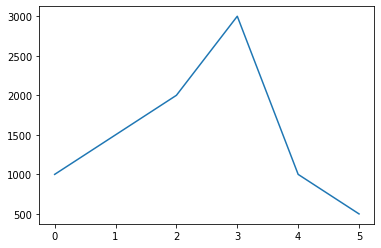

In [72]:
sales = Series([1000, 1500, 2000, 3000, 1000, 500])

# in Pandas in Jupyter with %pylab inline, I can say:
sales.plot.line()  # easier access